# Dry Bean Dataset


#### import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler

In [ ]:
df=pd.read_csv("/content/Dry_Bean_Dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [ ]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

In [ ]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

#### Outlier Treatment

In [ ]:
import numpy as np

# Loop through each column in the DataFrame
for column in df.columns:
    # Check if the column is numerical
    if np.issubdtype(df[column].dtype, np.number):
        # Calculate median and interquartile range
        median = df[column].median()
        iqr = df[column].quantile(0.75) - df[column].quantile(0.25)

        # Calculate lower and upper bounds for outliers
        lower_bound = df[column].quantile(0.25) - 1.5 * iqr
        upper_bound = df[column].quantile(0.75) + 1.5 * iqr

        # Replace outliers with median
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])



In [ ]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395.0    610.291       208.178117       173.888747      1.197191   
1  28734.0    638.018       200.524796       182.734419      1.097356   
2  29380.0    624.110       212.826130       175.931143      1.209713   
3  30008.0    645.884       210.557999       182.516516      1.153638   
4  30140.0    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.764441     28715.0     190.141097  0.763923  0.988856   0.958027   
1      0.764441     29172.0     191.272751  0.783968  0.984986   0.887034   
2      0.764441     29690.0     193.410904  0.778113  0.989559   0.947849   
3      0.764441     30724.0     195.467062  0.782681  0.988283   0.903936   
4      0.764441     30417.0     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.801277      0.006979      0.003564      0.642044      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.801277      0.006697      0.003665      0.642044      0.999166  SEKER

#### Univariate analysis

Summary statistics for Area:
count    13611.000000
mean     47979.787892
std      15943.838614
min      20420.000000
25%      36328.000000
50%      44652.000000
75%      57029.500000
max      98399.000000
Name: Area, dtype: float64


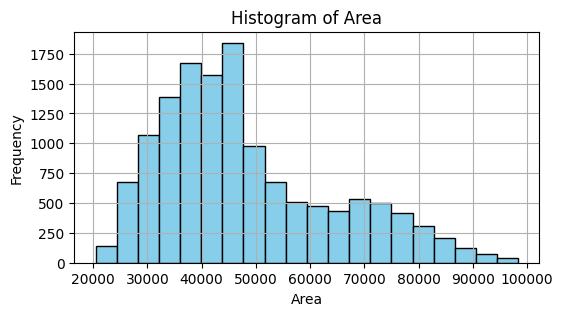

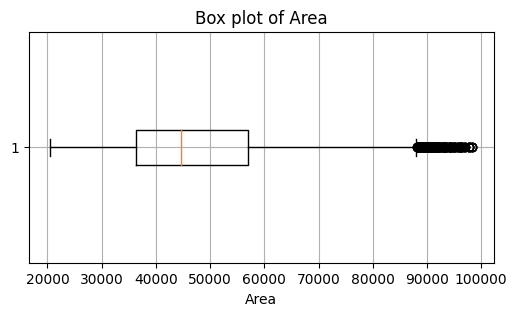

Summary statistics for Perimeter:
count    13611.000000
mean       825.869219
std        156.926324
min        524.736000
25%        703.523500
50%        794.941000
75%        947.322000
max       1385.807000
Name: Perimeter, dtype: float64


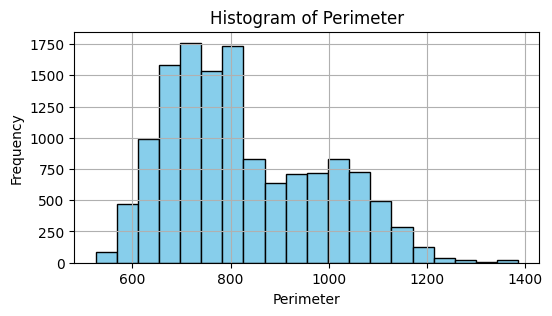

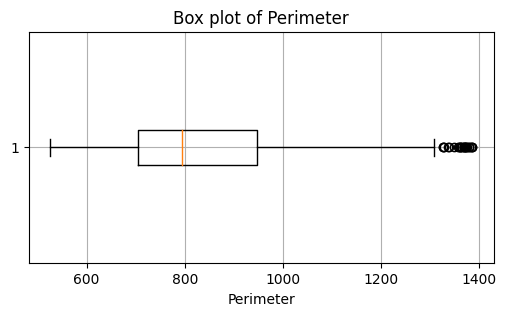

Summary statistics for MajorAxisLength:
count    13611.000000
mean       311.209225
std         69.078067
min        183.601165
25%        253.303633
50%        296.883367
75%        369.562492
max        560.873087
Name: MajorAxisLength, dtype: float64


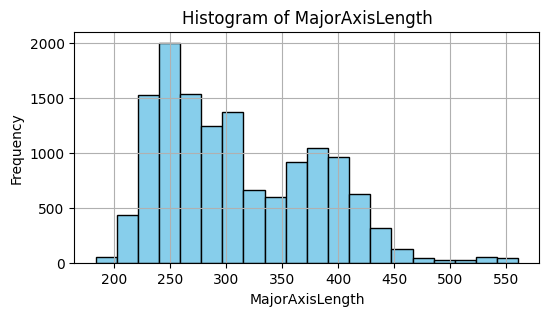

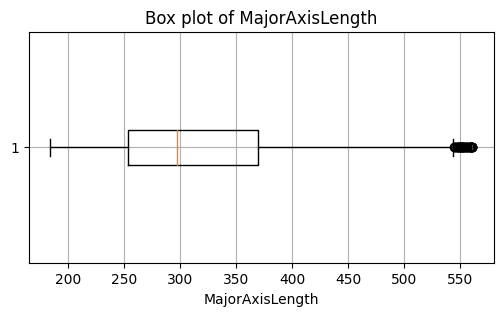

Summary statistics for MinorAxisLength:
count    13611.000000
mean       194.965534
std         28.126824
min        122.512653
25%        175.848170
50%        192.431733
75%        208.803213
max        277.520232
Name: MinorAxisLength, dtype: float64


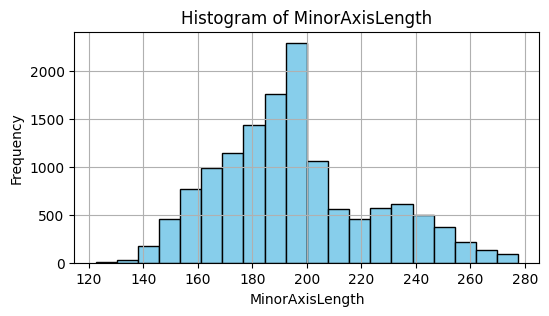

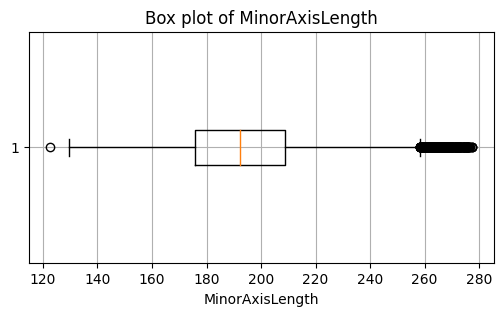

Summary statistics for AspectRation:
count    13611.000000
mean         1.561100
std          0.218085
min          1.024868
25%          1.432307
50%          1.551124
75%          1.677791
max          2.119220
Name: AspectRation, dtype: float64


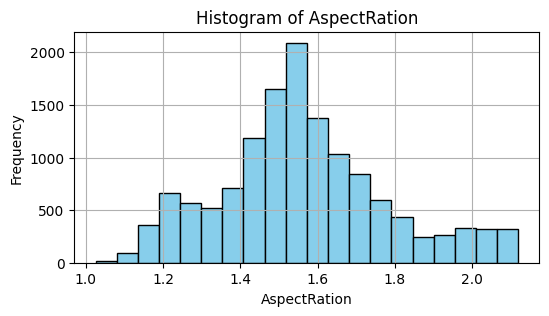

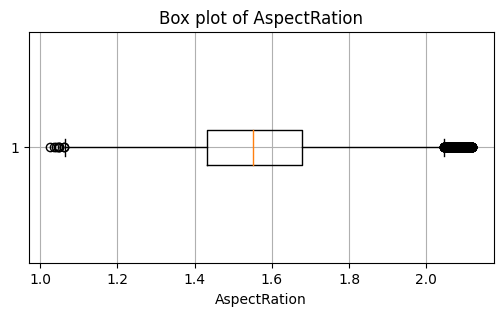

Summary statistics for Eccentricity:
count    13611.000000
mean         0.766042
std          0.069155
min          0.574247
25%          0.731818
50%          0.764441
75%          0.810466
max          0.911423
Name: Eccentricity, dtype: float64


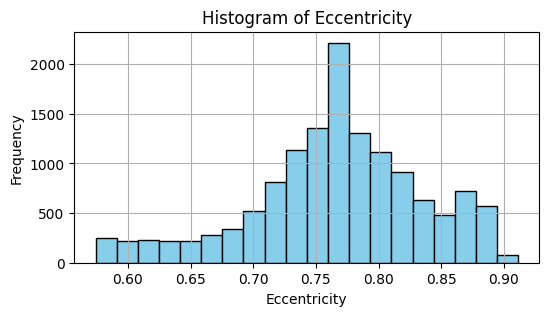

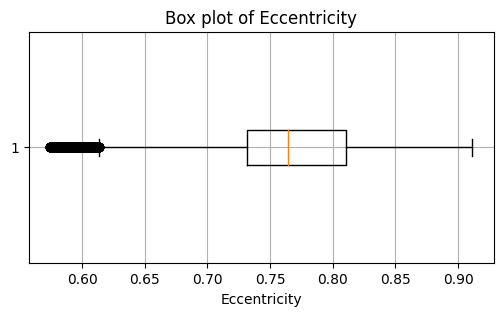

Summary statistics for ConvexArea:
count     13611.000000
mean      48632.467783
std       16260.781717
min       20684.000000
25%       36714.500000
50%       45178.000000
75%       57933.500000
max      100632.000000
Name: ConvexArea, dtype: float64


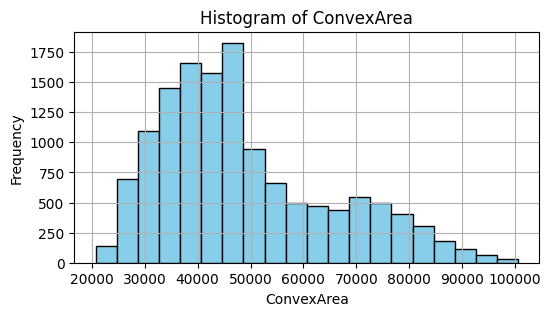

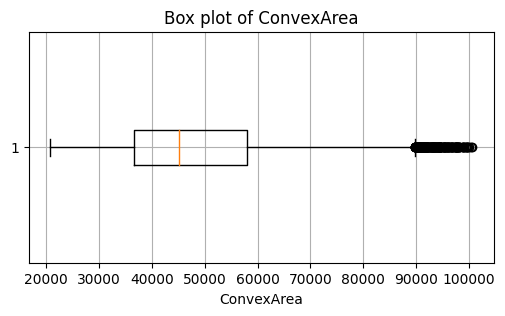

Summary statistics for EquivDiameter:
count    13611.000000
mean       244.181396
std         40.014838
min        161.243764
25%        215.068003
50%        238.438026
75%        269.847814
max        370.670410
Name: EquivDiameter, dtype: float64


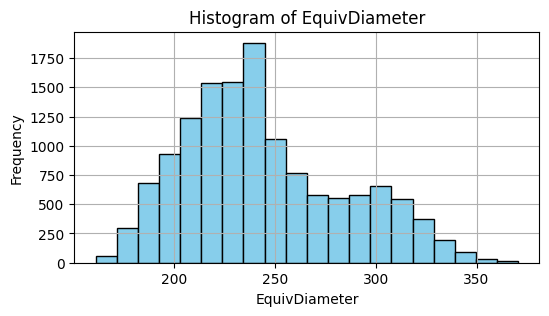

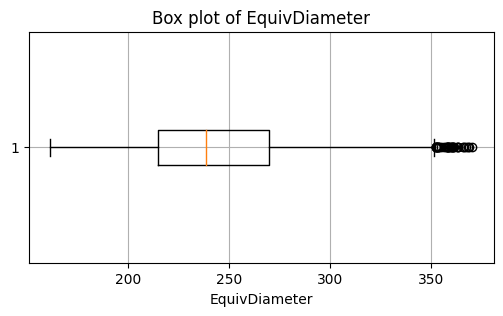

Summary statistics for Extent:
count    13611.000000
mean         0.752961
std          0.044113
min          0.616503
25%          0.722120
50%          0.759859
75%          0.786851
max          0.866195
Name: Extent, dtype: float64


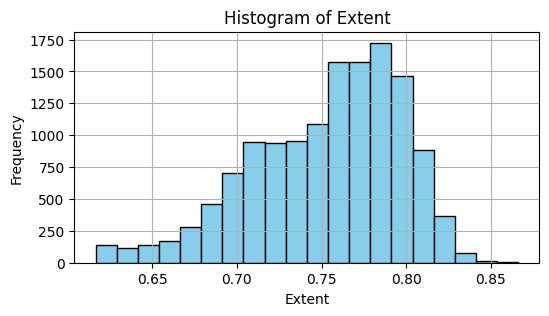

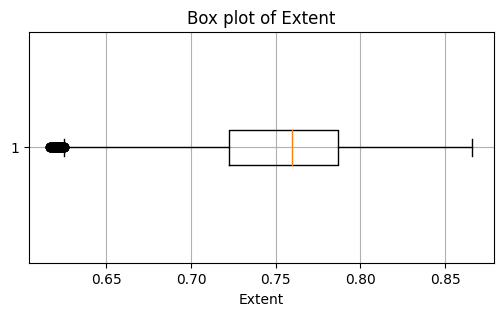

Summary statistics for Solidity:
count    13611.000000
mean         0.987976
std          0.002934
min          0.979161
25%          0.986488
50%          0.988283
75%          0.990013
max          0.994677
Name: Solidity, dtype: float64


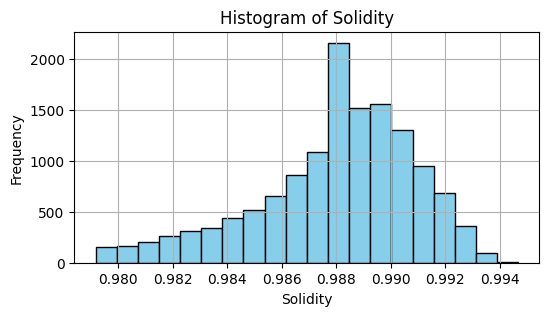

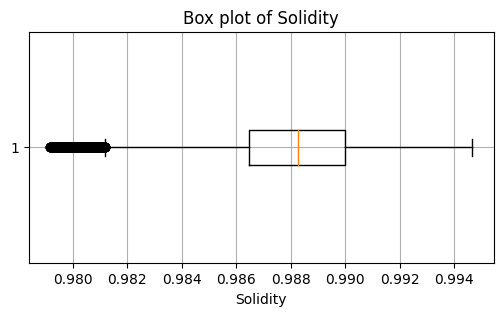

Summary statistics for roundness:
count    13611.000000
mean         0.874760
std          0.056852
min          0.705076
25%          0.834370
50%          0.883157
75%          0.916869
max          0.990685
Name: roundness, dtype: float64


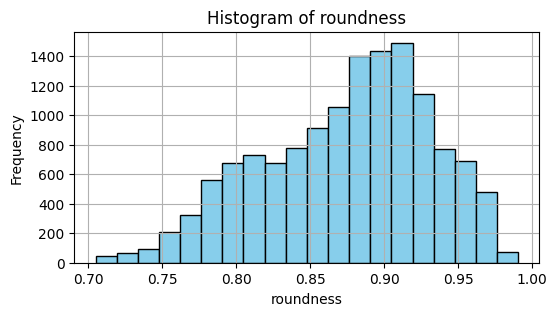

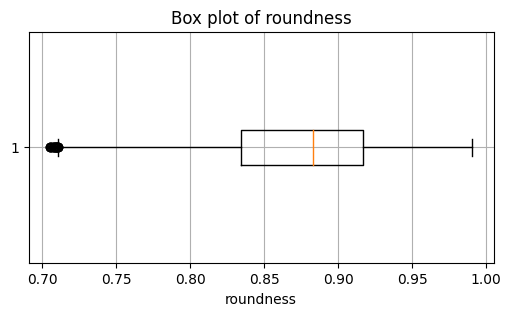

Summary statistics for Compactness:
count    13611.000000
mean         0.799064
std          0.060160
min          0.654998
25%          0.762782
50%          0.801277
75%          0.833067
max          0.941911
Name: Compactness, dtype: float64


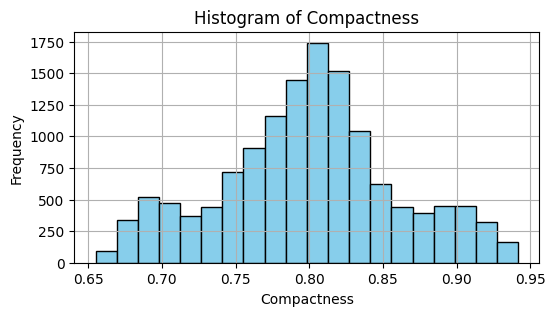

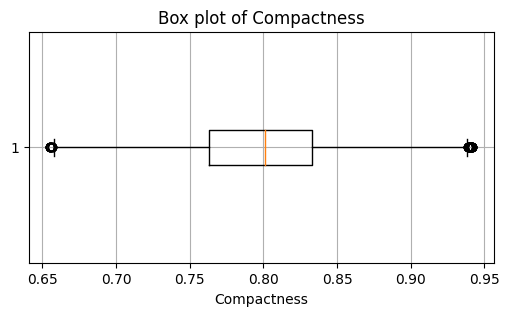

Summary statistics for ShapeFactor1:
count    13611.000000
mean         0.006679
std          0.000935
min          0.003843
25%          0.006094
50%          0.006645
75%          0.007267
max          0.009328
Name: ShapeFactor1, dtype: float64


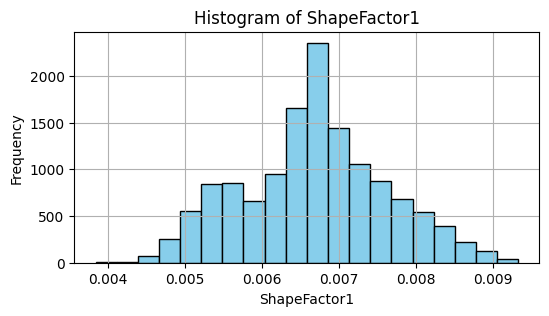

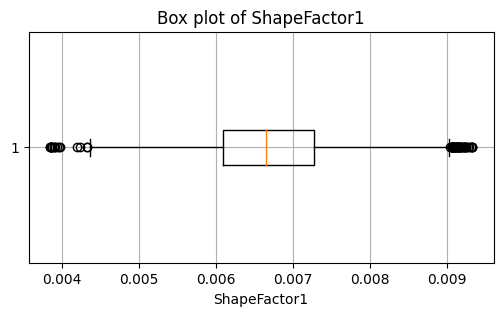

Summary statistics for ShapeFactor2:
count    13611.000000
mean         0.001716
std          0.000596
min          0.000564
25%          0.001154
50%          0.001694
75%          0.002170
max          0.003665
Name: ShapeFactor2, dtype: float64


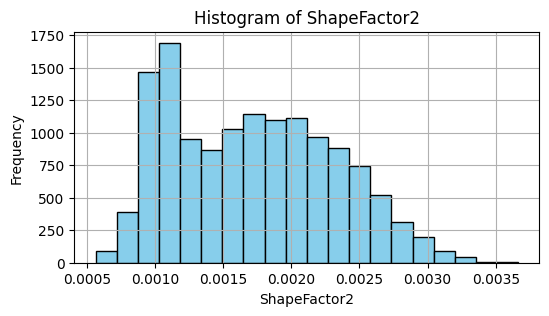

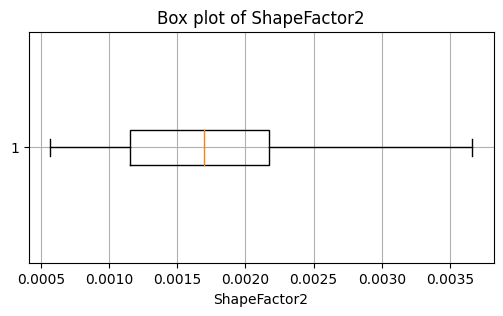

Summary statistics for ShapeFactor3:
count    13611.000000
mean         0.640013
std          0.094330
min          0.410339
25%          0.581359
50%          0.642044
75%          0.691943
max          0.867761
Name: ShapeFactor3, dtype: float64


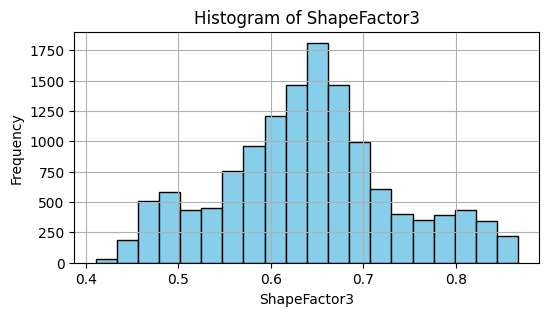

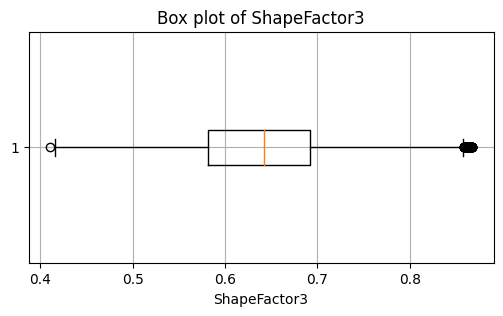

Summary statistics for ShapeFactor4:
count    13611.000000
mean         0.995864
std          0.002668
min          0.987436
25%          0.994516
50%          0.996386
75%          0.997883
max          0.999733
Name: ShapeFactor4, dtype: float64


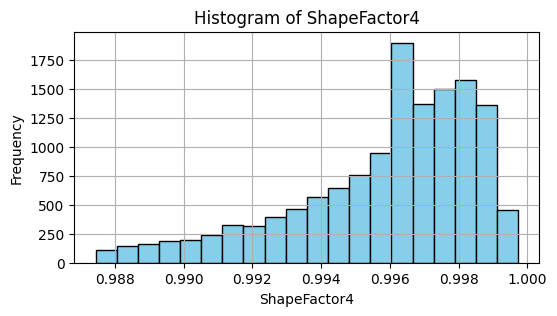

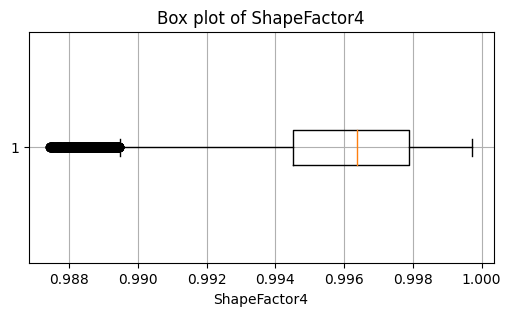

Value counts for Class:
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64




In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Loop through each column for univariate analysis
for column in df.columns:
    # Check if the column contains numerical data
    if pd.api.types.is_numeric_dtype(df[column]):
        # Summary statistics
        print(f"Summary statistics for {column}:")
        print(df[column].describe())

        # Histogram
        plt.figure(figsize=(6, 3))
        plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)


        # Box plot
        plt.figure(figsize=(6, 3))
        plt.boxplot(df[column], vert=False)
        plt.title(f'Box plot of {column}')
        plt.xlabel(column)
        plt.grid(True)
        plt.show()

    else:
        # Value counts for object type columns
        print(f"Value counts for {column}:")
        print(df[column].value_counts())
        print("\n")


#### bivariate analysis

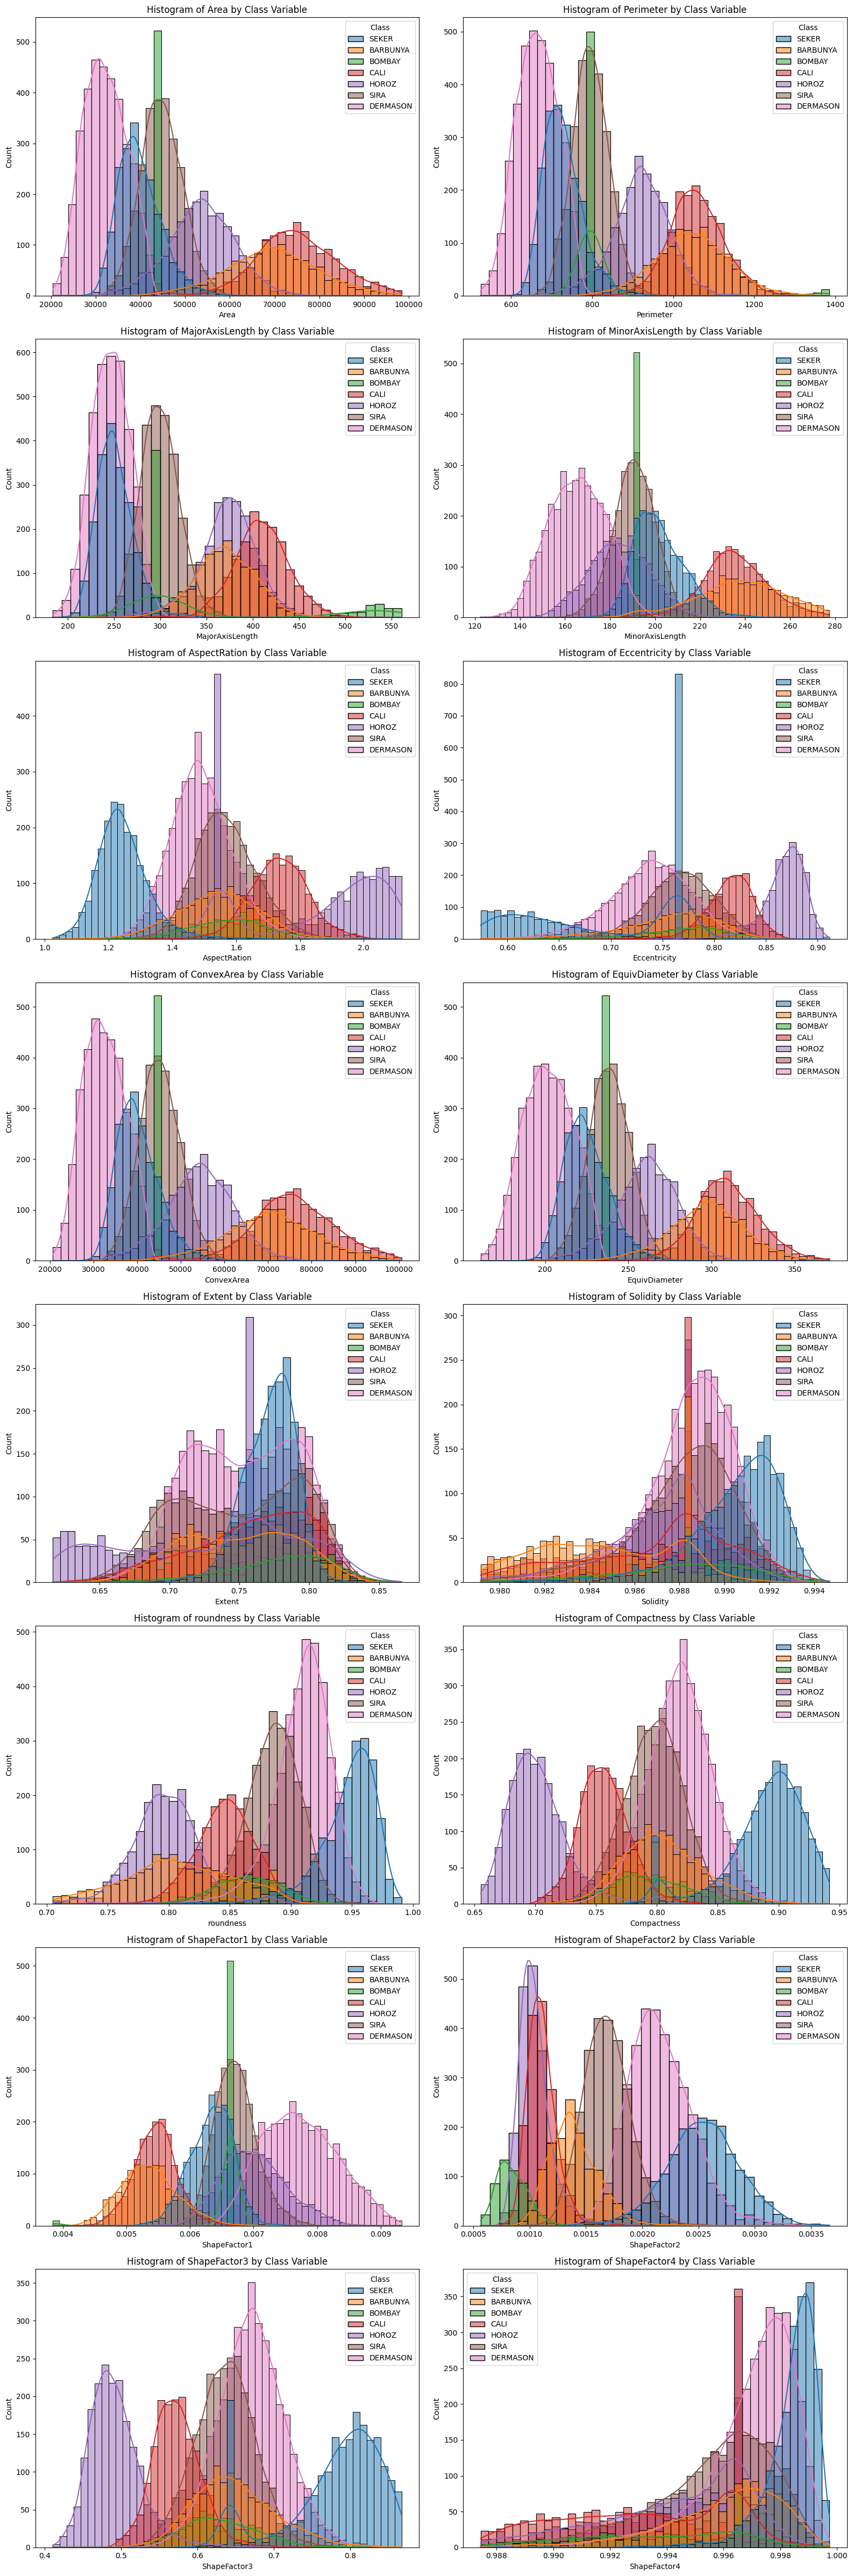

In [ ]:
numerical_columns = df.columns[df.columns != 'Class']

num_plots = len(numerical_columns)
num_rows = (num_plots + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(16, 6 * num_rows))

if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(numerical_columns):
    row_index = i // 2
    col_index = i % 2

    sns.histplot(data=df, x=column, hue='Class', kde=True, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Histogram of {column} by Class Variable')

for i in range(num_plots, num_rows * 2):
    axes[i // 2, i % 2].axis('off')

plt.tight_layout()
plt.show()


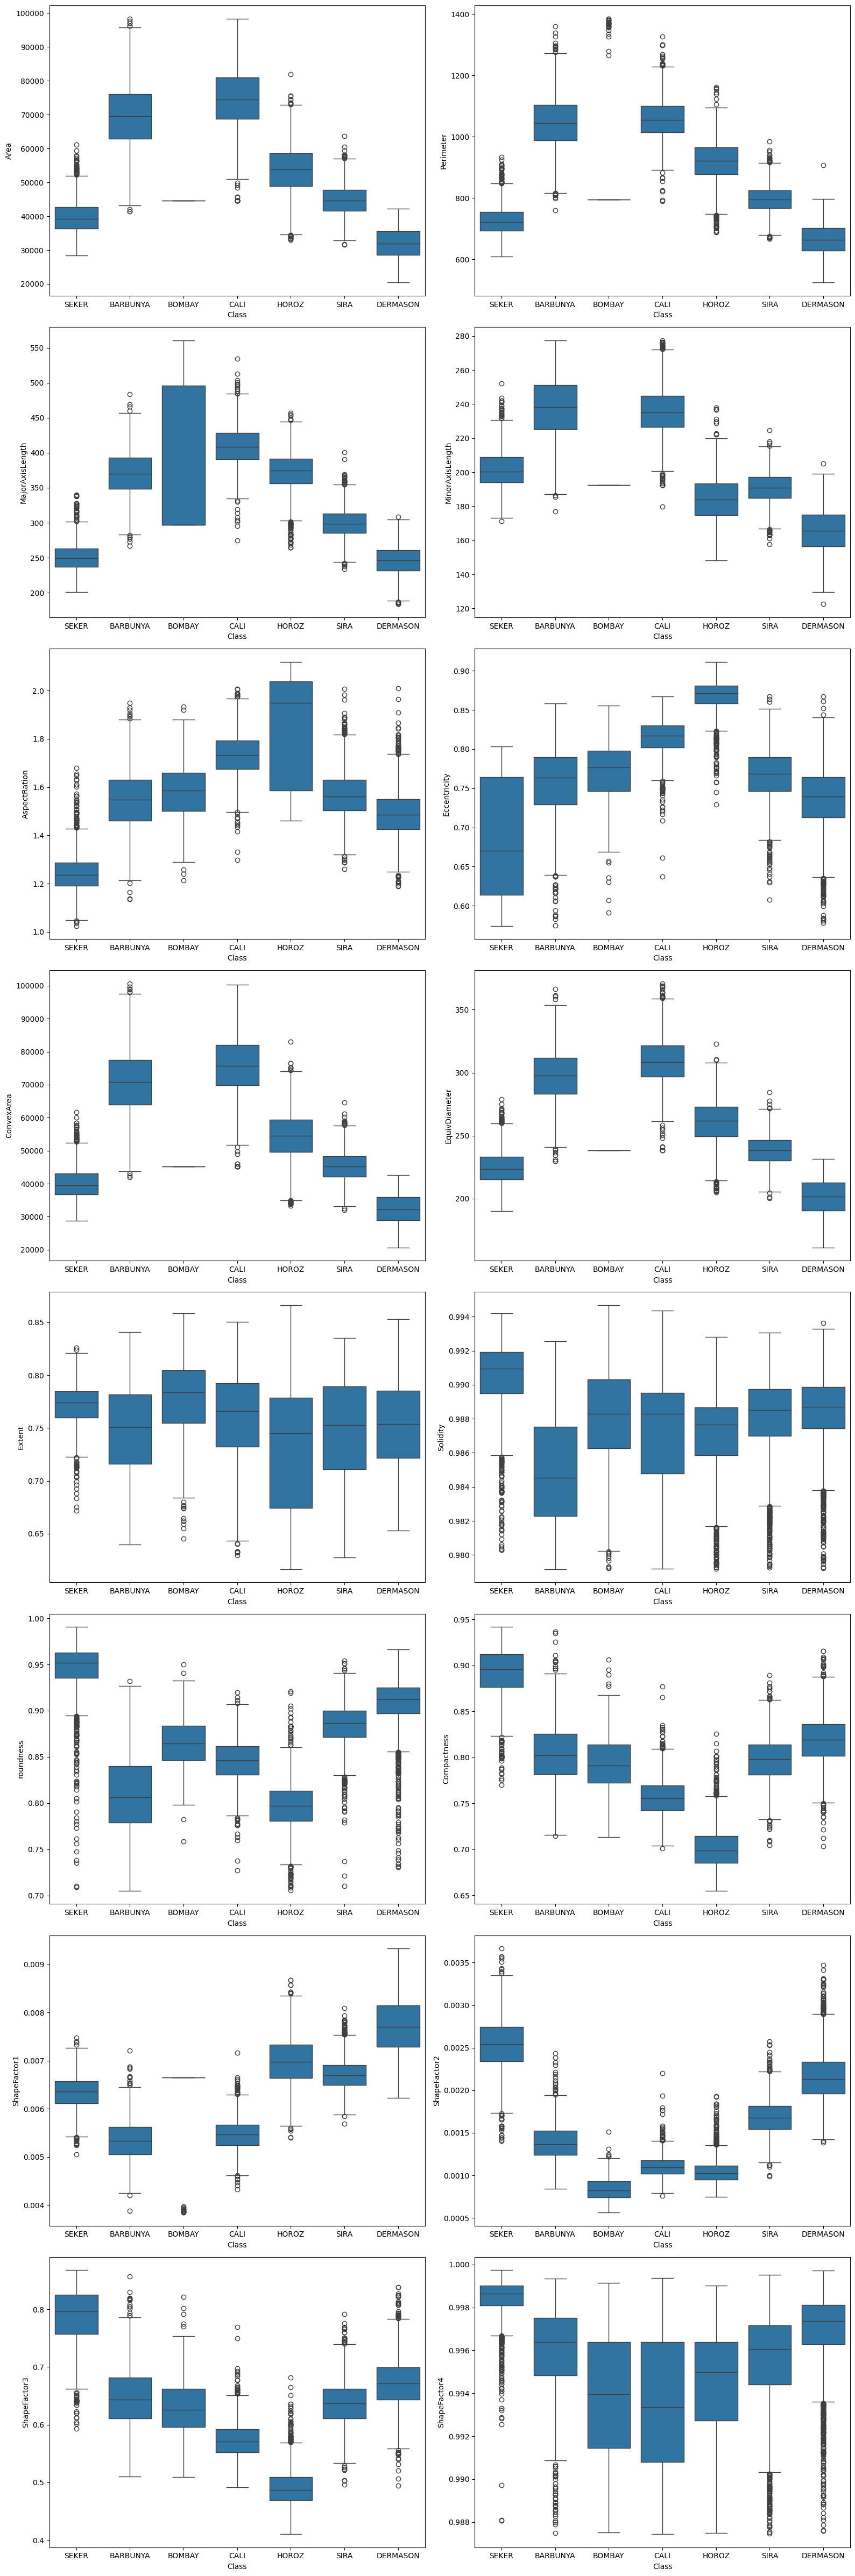

In [ ]:
numerical_columns = df.columns[df.columns != 'Class']
num_rows = (len(numerical_columns) + 1) // 2
fig, axes = plt.subplots(num_rows, 2, figsize=(16, 6 * num_rows))
for i, column in enumerate(numerical_columns):
    row_index, col_index = divmod(i, 2)
    sns.boxplot(x='Class', y=column, data=df, ax=axes[row_index, col_index])
for i in range(len(numerical_columns), num_rows * 2):
    axes[i // 2, i % 2].axis('off')
plt.tight_layout()
plt.show()


<ipython-input-134-1b33c00b9475>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='tab10')


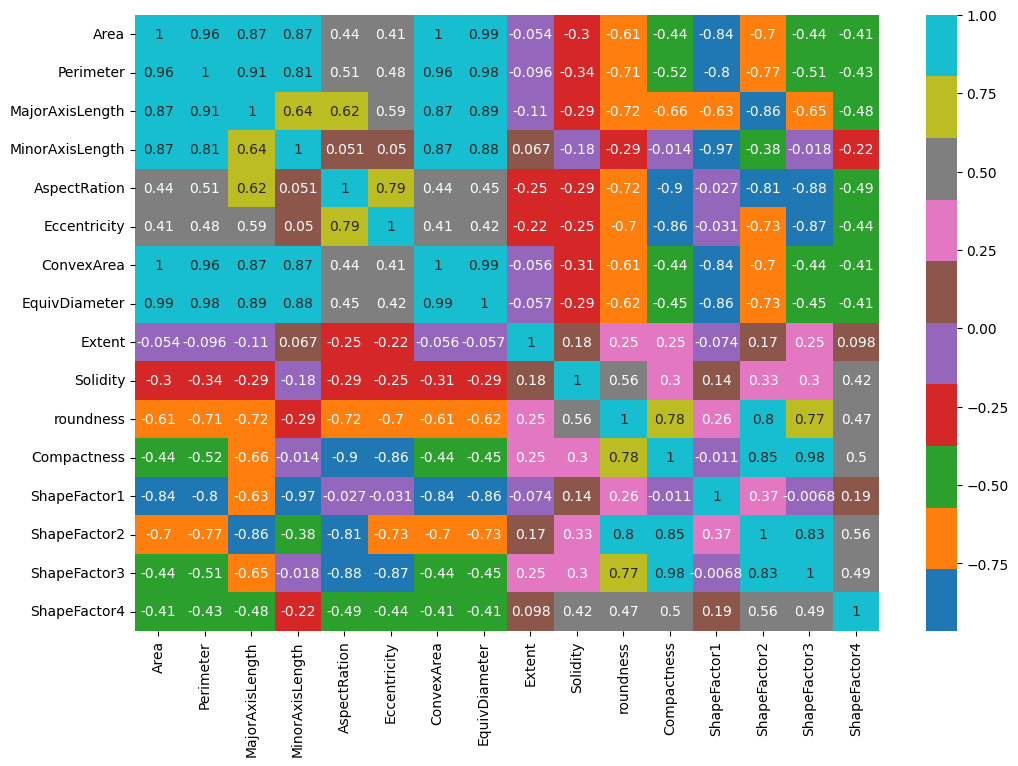

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True,cmap='tab10')
plt.show()

#### Classification

##### finding best "k" through different methods

In [ ]:
fv=df.iloc[:,:-1]
cv=df.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=10,stratify=cv)


In [ ]:
k=[]
acc=[]
err=[]
for n in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=n)
  model=knn.fit(x_train,y_train)
  predicted=model.predict(x_test)
  k.append(n)
  acc.append(accuracy_score(y_test,predicted))
  err.append(1-accuracy_score(y_test,predicted))

Text(0.5, 1.0, 'k vs accuracy')

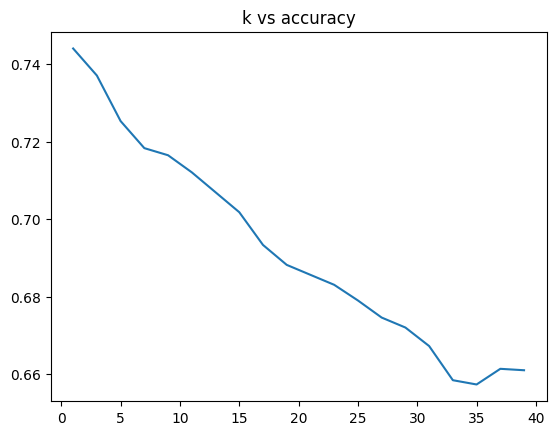

In [ ]:
plt.plot(k,acc)
plt.title("k vs accuracy")

Text(0.5, 1.0, 'k vs accuracy')

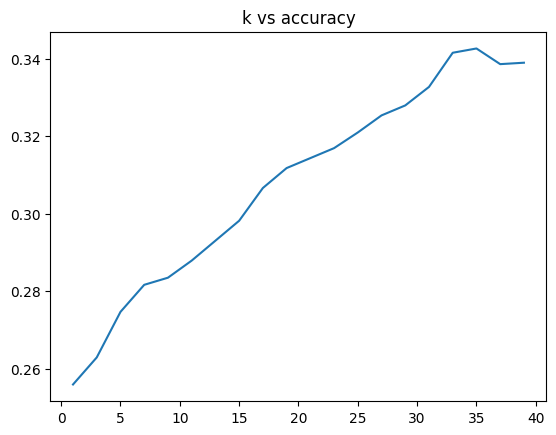

In [ ]:
plt.plot(k,err)
plt.title("k vs accuracy")

In [ ]:
x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,random_state=10,stratify=y_train)

In [ ]:
## method 2

k=[]
acc_cv=[]
err_cv=[]
for n in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=n)
  model=knn.fit(x_trainf,y_trainf)
  predicted=model.predict(x_cv)
  k.append(n)
  acc_cv.append(accuracy_score(y_cv,predicted))
  err_cv.append(1-accuracy_score(y_cv,predicted))

Text(0.5, 1.0, 'k vs accuracy')

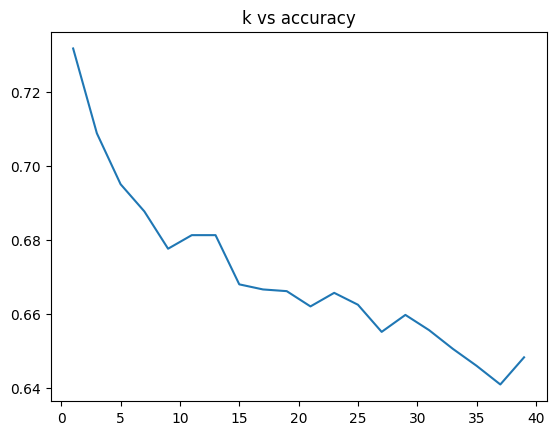

In [ ]:
plt.plot(k,acc_cv)
plt.title("k vs accuracy")

Text(0.5, 1.0, 'k vs error')

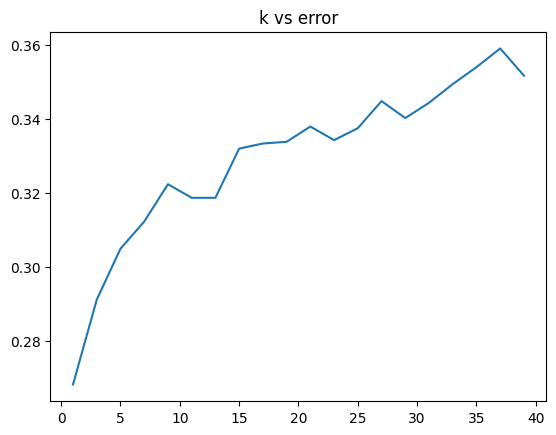

In [ ]:

plt.plot(k,err_cv)
plt.title("k vs error")

train and test error plotting

In [ ]:

k1=[]
tr_err=[]
cv_err=[]
for k in range(1,40,2):
  k1.append(k)
  knn=KNeighborsClassifier(n_neighbors=k)
  model=knn.fit(x_trainf,y_trainf)
  #training error
  pred_t=model.predict(x_trainf)
  tr_err.append(1-accuracy_score(y_trainf,pred_t))
  #cv error
  pred_cv=model.predict(x_cv)
  cv_err.append(1-accuracy_score(y_cv,pred_cv))

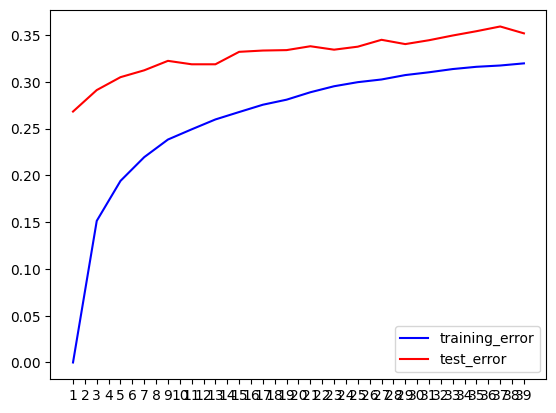

In [ ]:
plt.plot(k1,tr_err,label="training_error",color='b')
plt.plot(k1,cv_err,label="test_error",color='r')
plt.xticks(range(1,40))
plt.legend()

 kfold and stratified k fold

In [ ]:
kf=KFold(n_splits=3)

k1=[]
f_acc=[]
for k in range(1,20,2):

  acc=[]
  for train_index,cv_index in kf.split(x_train):
    x_trainf,x_cv,y_trainf,y_cv=x_train.iloc[train_index],x_train.iloc[cv_index],y_train.iloc[train_index],y_train.iloc[cv_index]
    knn=KNeighborsClassifier(n_neighbors=k)
    model=knn.fit(x_trainf,y_trainf)
    predicted=model.predict(x_cv)
    acc.append(accuracy_score(y_cv,predicted))
  f_acc.append(np.mean(np.array(acc)))
  k1.append(k)

In [ ]:
final_acc=[]
k1=[]
for k in range(1,40,2):
  final_acc.append(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=k),x_train,y_train,scoring='accuracy',cv=5)))
  k1.append(k)


In [ ]:
final_acc

[0.7330090481800509,
 0.7199666097649143,
 0.7113337829795006,
 0.7032512454903568,
 0.6981995171998095,
 0.6951690876274331,
 0.6904857233123822,
 0.6892906599717473,
 0.6824028905584006,
 0.6816682294612726,
 0.6783621490724677,
 0.676708792522882,
 0.6705548405928411,
 0.668901694946711,
 0.667799640029982,
 0.6656876950066076,
 0.6608195370837873,
 0.6573293801589621,
 0.6562271565194686,
 0.6541151693154031]

##### Getting Generalised accuracy through different algorithms

In [ ]:
## testing accuracy on unseen data
knn=KNeighborsClassifier(n_neighbors=7)
model=knn.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)*100

70.21667278736687

In [ ]:
brutef=KNeighborsClassifier(n_neighbors=7,algorithm='brute')
model=brutef.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)*100

70.21667278736687

In [ ]:
kdtree=KNeighborsClassifier(n_neighbors=7,algorithm='kd_tree')
model=kdtree.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)*100

70.21667278736687

In [ ]:
balltree=KNeighborsClassifier(n_neighbors=7,algorithm='ball_tree')
model=balltree.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)*100

70.21667278736687

In [ ]:
auto=KNeighborsClassifier(n_neighbors=7,algorithm='auto')
model=auto.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)*100

70.21667278736687

#### Conclusion


After analyzing the performance of the K-nearest neighbors (KNN) algorithm with different values of k, we've determined that k=7
provides the best accuracy. At this point, the accuracy is high, and there's minimal change in accuracy beyond this value. Additionally, the error is relatively low when k=7.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(fv, cv, test_size=0.2, random_state=42)

# Train the KNN model with k=7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)


Accuracy: 71.6856408373118



After conducting an extensive evaluation of various algorithms, including KDTree, BallTree, and Brute-Force, we've observed that they all exhibit a similar level of performance in terms of accuracy. Across the board, regardless of the algorithm employed, the general accuracy rate remains consistently at 71%.

This finding suggests that the choice of algorithm doesn't significantly impact the predictive capability of the model. Despite their differences in implementation and computational complexity, these algorithms yield comparable results in terms of accuracy.

# Dry Bean Dataset after feature selection


#### import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler

In [ ]:
df1=pd.read_csv("/content/Dry_Bean_Dataset.csv")

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
df1.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [ ]:
df1.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

In [ ]:
df1.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
columns_to_remove = ['EquivDiameter', 'Compactness', 'ConvexArea']

# Remove columns
df = df1.drop(columns=columns_to_remove)

In [ ]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'Extent', 'Solidity', 'roundness',
       'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4',
       'Class'],
      dtype='object')

In [ ]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity    Extent  Solidity  roundness  ShapeFactor1  ShapeFactor2  \
0      0.549812  0.763923  0.988856   0.958027      0.007332      0.003147   
1      0.411785  0.783968  0.984986   0.887034      0.006979      0.003564   
2      0.562727  0.778113  0.989559   0.947849      0.007244      0.003048   
3      0.498616  0.782681  0.976696   0.903936      0.007017      0.003215   
4      0.333680  0.773098  0.990893   0.984877      0.006697      0.003665   

   ShapeFactor3  ShapeFactor4  Class  
0      0.834222      0.998724  SEKER  
1      0.909851      0.998430  SEKER  
2      0.825871      0.999066  SEKER  
3      0.861794      0.994199  SEKER  
4      0.941900      0.999166  SEKER

#### Outlier Treatment

In [ ]:
import numpy as np

# Loop through each column in the DataFrame
for column in df.columns:
    # Check if the column is numerical
    if np.issubdtype(df[column].dtype, np.number):
        # Calculate median and interquartile range
        median = df[column].median()
        iqr = df[column].quantile(0.75) - df[column].quantile(0.25)

        # Calculate lower and upper bounds for outliers
        lower_bound = df[column].quantile(0.25) - 1.5 * iqr
        upper_bound = df[column].quantile(0.75) + 1.5 * iqr

        # Replace outliers with median
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])



In [ ]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395.0    610.291       208.178117       173.888747      1.197191   
1  28734.0    638.018       200.524796       182.734419      1.097356   
2  29380.0    624.110       212.826130       175.931143      1.209713   
3  30008.0    645.884       210.557999       182.516516      1.153638   
4  30140.0    620.134       201.847882       190.279279      1.060798   

   Eccentricity    Extent  Solidity  roundness  ShapeFactor1  ShapeFactor2  \
0      0.764441  0.763923  0.988856   0.958027      0.007332      0.003147   
1      0.764441  0.783968  0.984986   0.887034      0.006979      0.003564   
2      0.764441  0.778113  0.989559   0.947849      0.007244      0.003048   
3      0.764441  0.782681  0.988283   0.903936      0.007017      0.003215   
4      0.764441  0.773098  0.990893   0.984877      0.006697      0.003665   

   ShapeFactor3  ShapeFactor4  Class  
0      0.834222      0.998724  SEKER  
1      0.642044      0.998430  SEKER  
2      0.825871      0.999066  SEKER  
3      0.861794      0.994199  SEKER  
4      0.642044      0.999166  SEKER

#### Univariate analysis

Summary statistics for Area:
count    13611.000000
mean     47979.787892
std      15943.838614
min      20420.000000
25%      36328.000000
50%      44652.000000
75%      57029.500000
max      98399.000000
Name: Area, dtype: float64


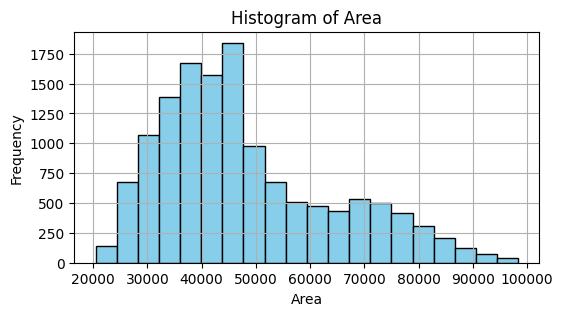

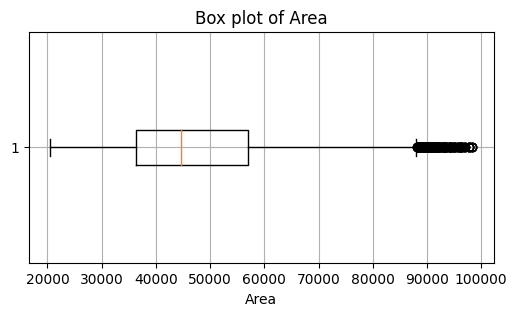

Summary statistics for Perimeter:
count    13611.000000
mean       825.869219
std        156.926324
min        524.736000
25%        703.523500
50%        794.941000
75%        947.322000
max       1385.807000
Name: Perimeter, dtype: float64


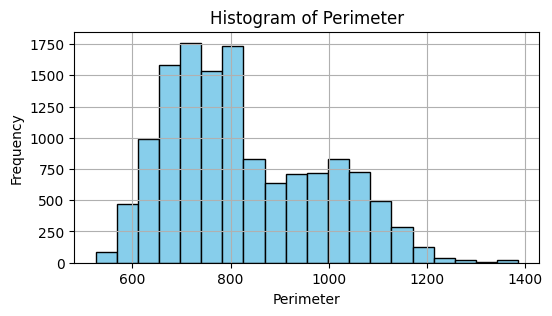

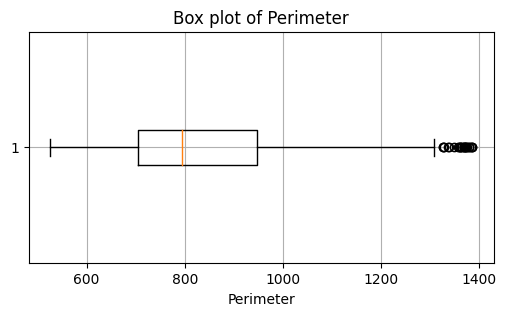

Summary statistics for MajorAxisLength:
count    13611.000000
mean       311.209225
std         69.078067
min        183.601165
25%        253.303633
50%        296.883367
75%        369.562492
max        560.873087
Name: MajorAxisLength, dtype: float64


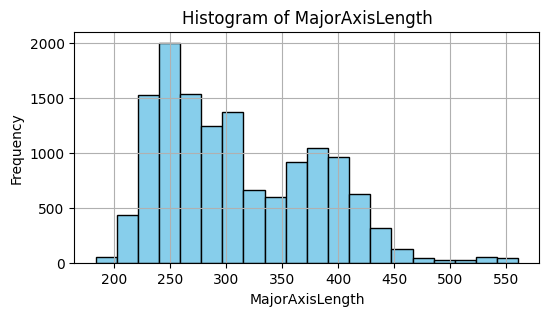

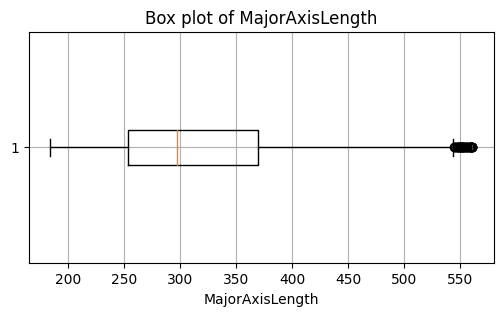

Summary statistics for MinorAxisLength:
count    13611.000000
mean       194.965534
std         28.126824
min        122.512653
25%        175.848170
50%        192.431733
75%        208.803213
max        277.520232
Name: MinorAxisLength, dtype: float64


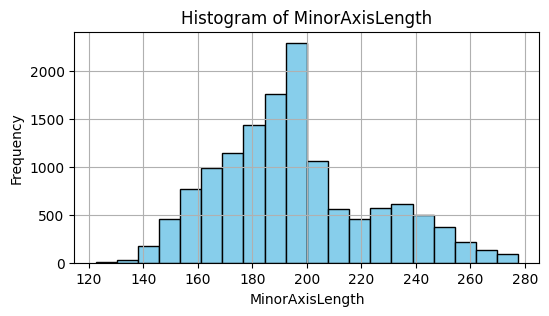

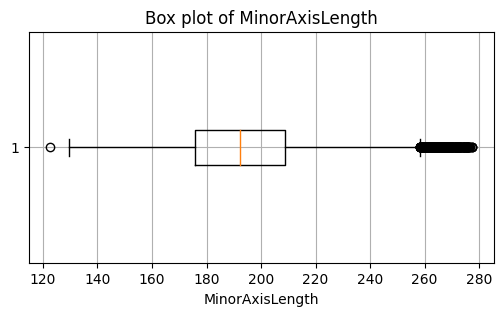

Summary statistics for AspectRation:
count    13611.000000
mean         1.561100
std          0.218085
min          1.024868
25%          1.432307
50%          1.551124
75%          1.677791
max          2.119220
Name: AspectRation, dtype: float64


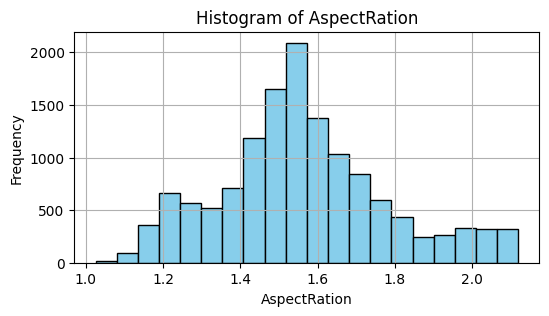

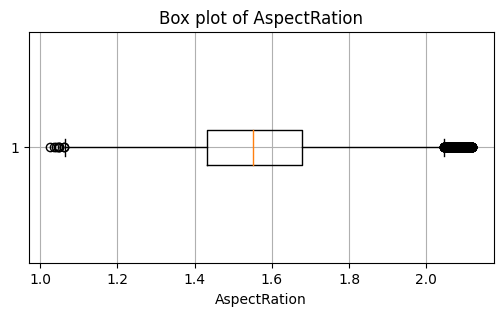

Summary statistics for Eccentricity:
count    13611.000000
mean         0.766042
std          0.069155
min          0.574247
25%          0.731818
50%          0.764441
75%          0.810466
max          0.911423
Name: Eccentricity, dtype: float64


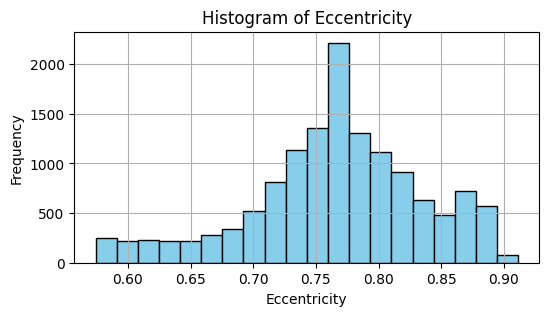

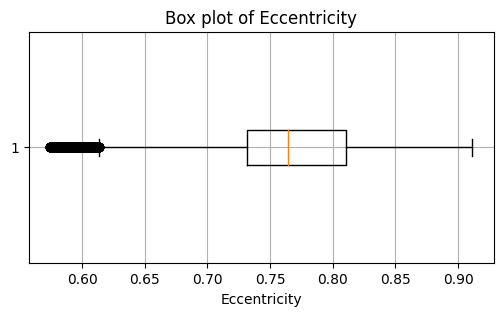

Summary statistics for Extent:
count    13611.000000
mean         0.752961
std          0.044113
min          0.616503
25%          0.722120
50%          0.759859
75%          0.786851
max          0.866195
Name: Extent, dtype: float64


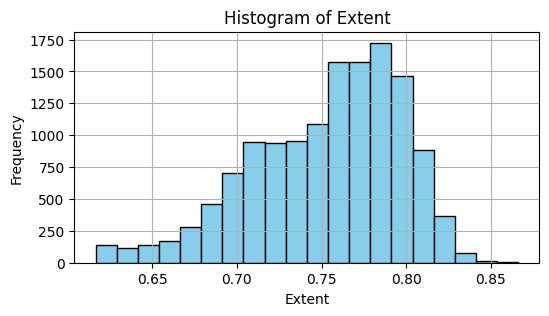

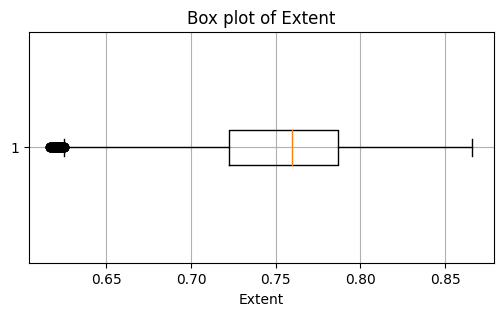

Summary statistics for Solidity:
count    13611.000000
mean         0.987976
std          0.002934
min          0.979161
25%          0.986488
50%          0.988283
75%          0.990013
max          0.994677
Name: Solidity, dtype: float64


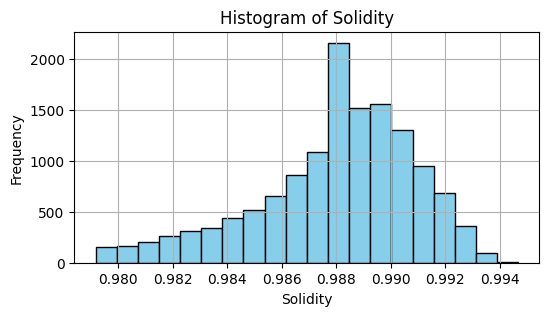

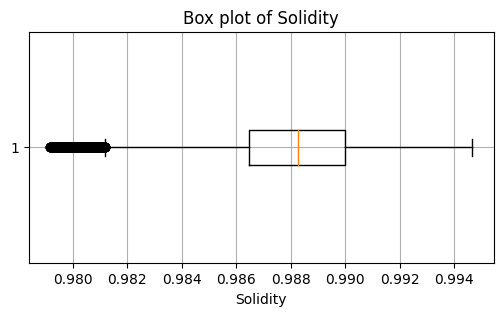

Summary statistics for roundness:
count    13611.000000
mean         0.874760
std          0.056852
min          0.705076
25%          0.834370
50%          0.883157
75%          0.916869
max          0.990685
Name: roundness, dtype: float64


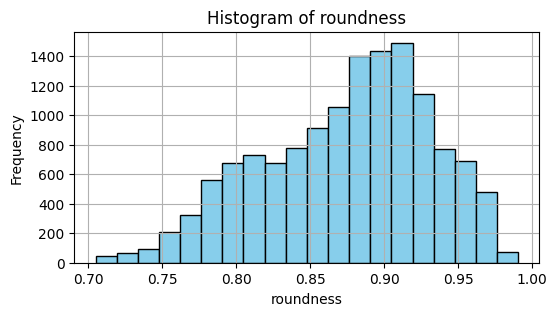

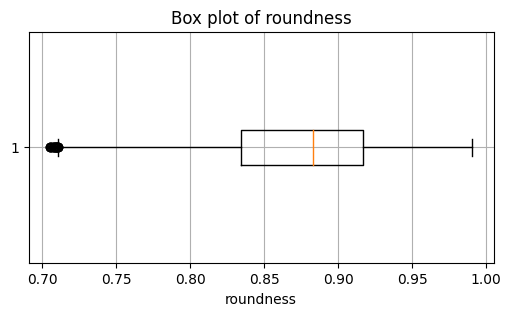

Summary statistics for ShapeFactor1:
count    13611.000000
mean         0.006679
std          0.000935
min          0.003843
25%          0.006094
50%          0.006645
75%          0.007267
max          0.009328
Name: ShapeFactor1, dtype: float64


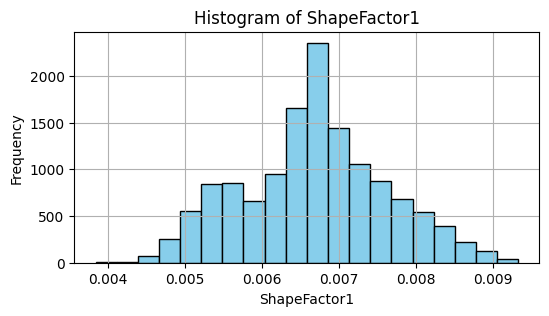

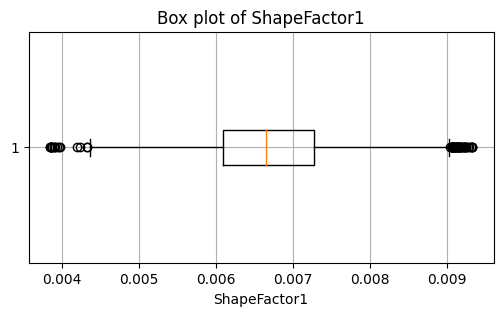

Summary statistics for ShapeFactor2:
count    13611.000000
mean         0.001716
std          0.000596
min          0.000564
25%          0.001154
50%          0.001694
75%          0.002170
max          0.003665
Name: ShapeFactor2, dtype: float64


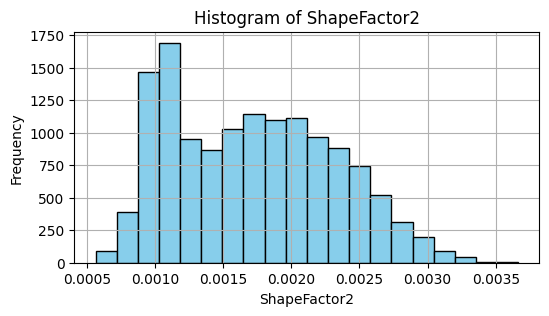

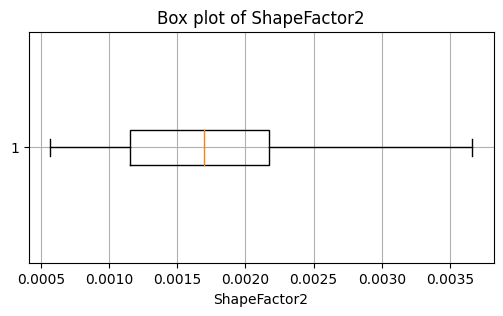

Summary statistics for ShapeFactor3:
count    13611.000000
mean         0.640013
std          0.094330
min          0.410339
25%          0.581359
50%          0.642044
75%          0.691943
max          0.867761
Name: ShapeFactor3, dtype: float64


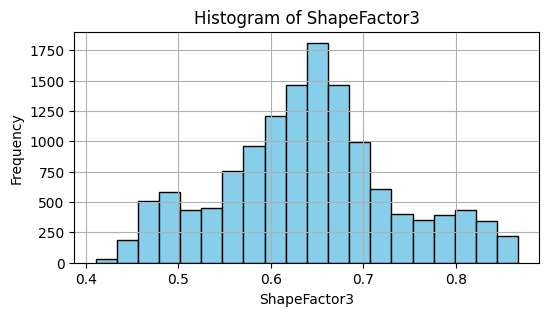

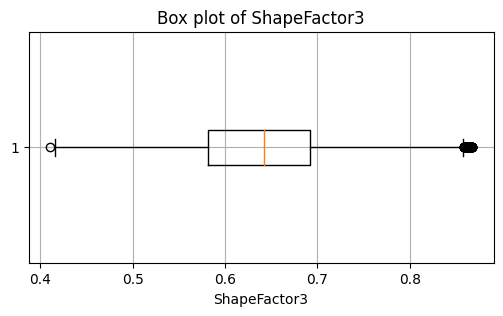

Summary statistics for ShapeFactor4:
count    13611.000000
mean         0.995864
std          0.002668
min          0.987436
25%          0.994516
50%          0.996386
75%          0.997883
max          0.999733
Name: ShapeFactor4, dtype: float64


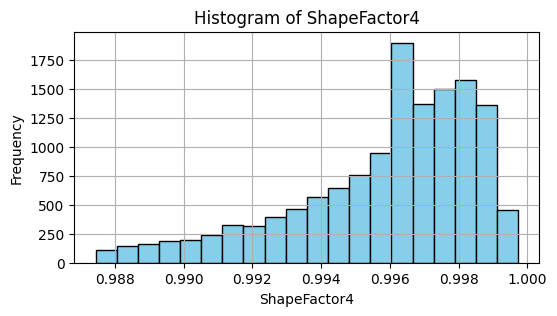

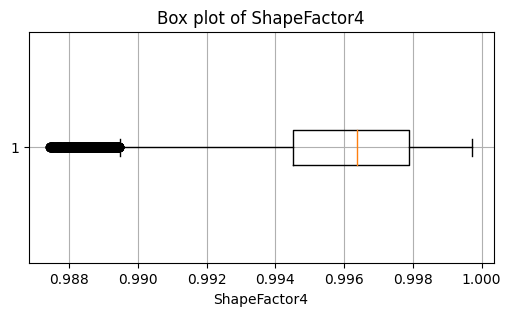

Value counts for Class:
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64




In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Loop through each column for univariate analysis
for column in df.columns:
    # Check if the column contains numerical data
    if pd.api.types.is_numeric_dtype(df[column]):
        # Summary statistics
        print(f"Summary statistics for {column}:")
        print(df[column].describe())

        # Histogram
        plt.figure(figsize=(6, 3))
        plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)


        # Box plot
        plt.figure(figsize=(6, 3))
        plt.boxplot(df[column], vert=False)
        plt.title(f'Box plot of {column}')
        plt.xlabel(column)
        plt.grid(True)
        plt.show()

    else:
        # Value counts for object type columns
        print(f"Value counts for {column}:")
        print(df[column].value_counts())
        print("\n")


#### bivariate analysis

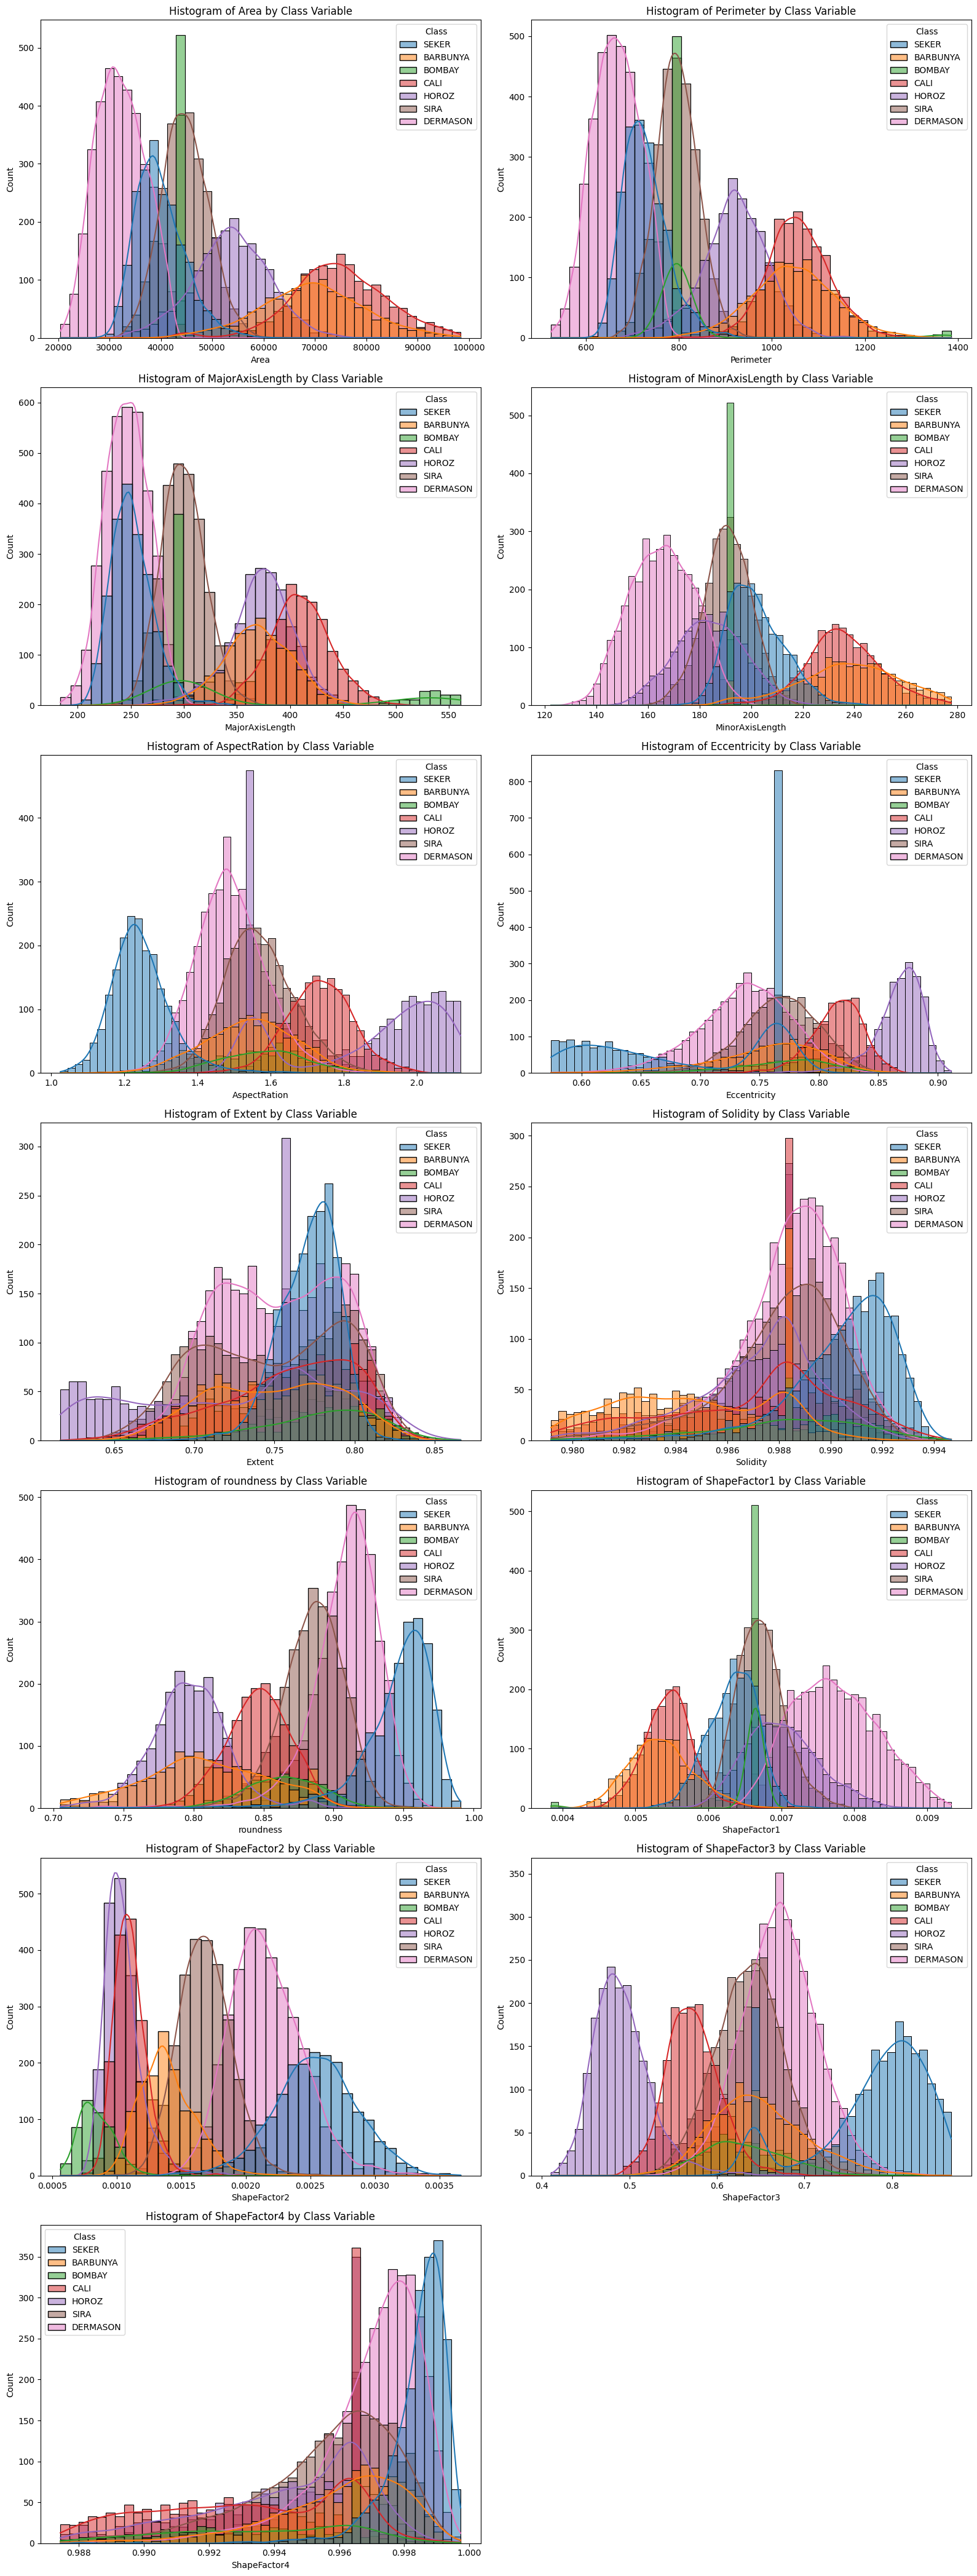

In [ ]:
numerical_columns = df.columns[df.columns != 'Class']

num_plots = len(numerical_columns)
num_rows = (num_plots + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(16, 6 * num_rows))

if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(numerical_columns):
    row_index = i // 2
    col_index = i % 2

    sns.histplot(data=df, x=column, hue='Class', kde=True, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Histogram of {column} by Class Variable')

for i in range(num_plots, num_rows * 2):
    axes[i // 2, i % 2].axis('off')

plt.tight_layout()
plt.show()


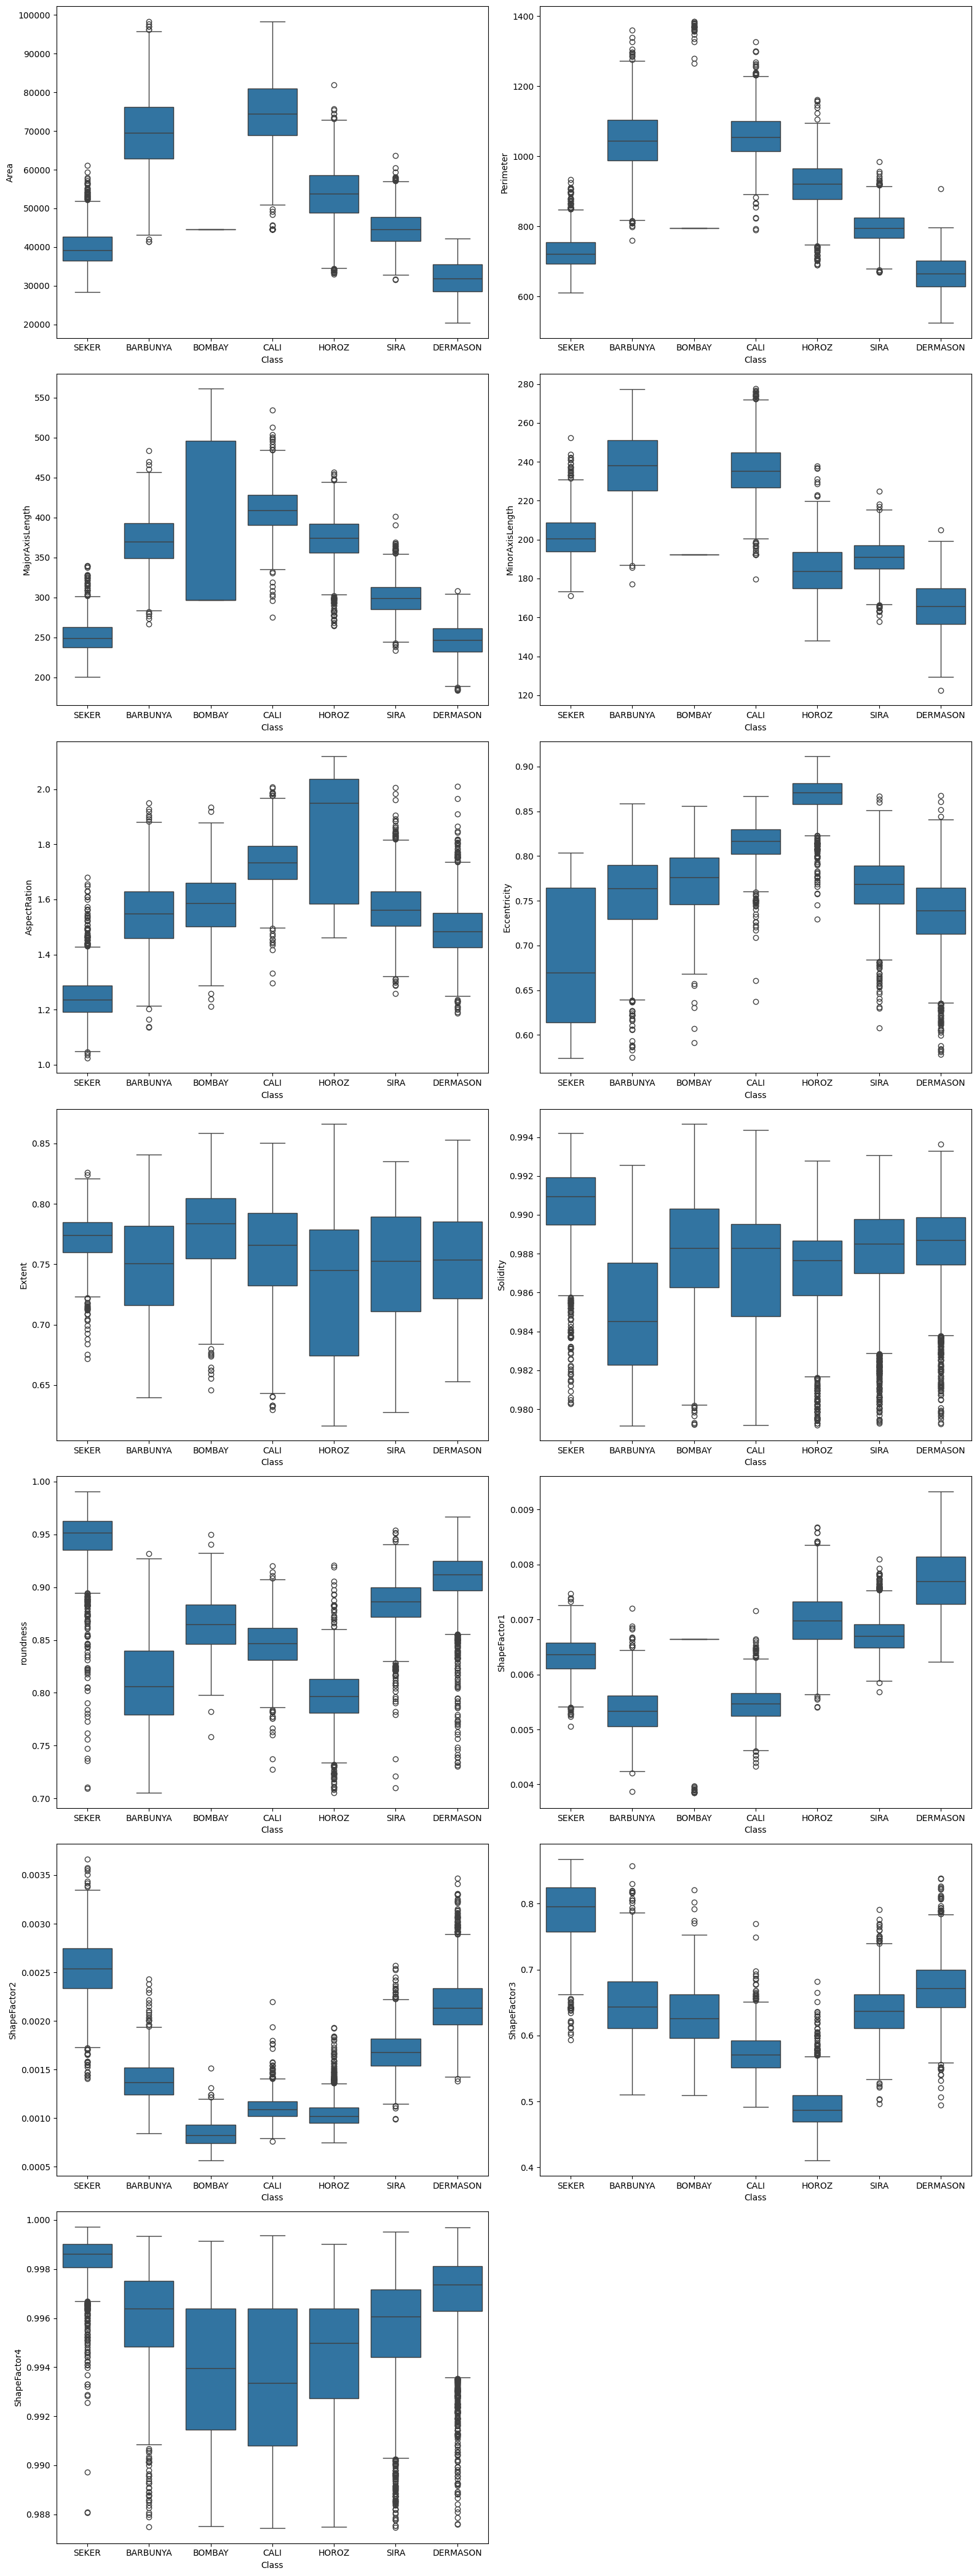

In [ ]:
numerical_columns = df.columns[df.columns != 'Class']
num_rows = (len(numerical_columns) + 1) // 2
fig, axes = plt.subplots(num_rows, 2, figsize=(16, 6 * num_rows))
for i, column in enumerate(numerical_columns):
    row_index, col_index = divmod(i, 2)
    sns.boxplot(x='Class', y=column, data=df, ax=axes[row_index, col_index])
for i in range(len(numerical_columns), num_rows * 2):
    axes[i // 2, i % 2].axis('off')
plt.tight_layout()
plt.show()


<ipython-input-283-1b33c00b9475>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='tab10')


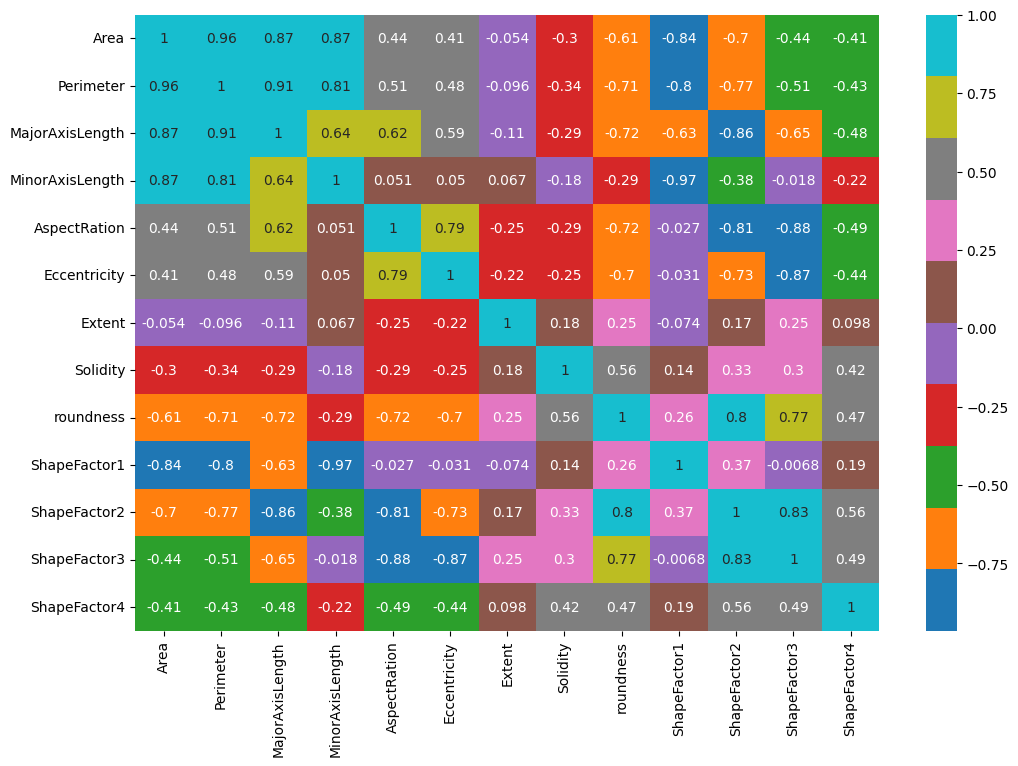

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True,cmap='tab10')
plt.show()

#### Classification

##### finding best "k" through different methods

In [ ]:
fv=df.iloc[:,:-1]
cv=df.iloc[:,-1]

In [ ]:
fv

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395.0    610.291       208.178117       173.888747      1.197191   
1      28734.0    638.018       200.524796       182.734419      1.097356   
2      29380.0    624.110       212.826130       175.931143      1.209713   
3      30008.0    645.884       210.557999       182.516516      1.153638   
4      30140.0    620.134       201.847882       190.279279      1.060798   
...        ...        ...              ...              ...           ...   
13606  42097.0    759.696       288.721612       185.944705      1.552728   
13607  42101.0    757.499       281.576392       190.713136      1.476439   
13608  42139.0    759.321       281.539928       191.187979      1.472582   
13609  42147.0    763.779       283.382636       190.275731      1.489326   
13610  42159.0    772.237       295.142741       182.204716      1.619841   

       Eccentricity    Extent  Solidity  roundness  ShapeFactor1  \
0          0.764441  0.763923  0.988856   0.958027      0.007332   
1          0.764441  0.783968  0.984986   0.887034      0.006979   
2          0.764441  0.778113  0.989559   0.947849      0.007244   
3          0.764441  0.782681  0.988283   0.903936      0.007017   
4          0.764441  0.773098  0.990893   0.984877      0.006697   
...             ...       ...       ...        ...           ...   
13606      0.765002  0.714574  0.990331   0.916603      0.006858   
13607      0.735702  0.799943  0.990752   0.922015      0.006688   
13608      0.734065  0.729932  0.989899   0.918424      0.006681   
13609      0.741055  0.705389  0.987813   0.907906      0.006724   
13610      0.786693  0.788962  0.989648   0.888380      0.007001   

       ShapeFactor2  ShapeFactor3  ShapeFactor4  
0          0.003147      0.834222      0.998724  
1          0.003564      0.642044      0.998430  
2          0.003048      0.825871      0.999066  
3          0.003215      0.861794      0.994199  
4          0.003665      0.642044      0.999166  
...             ...           ...           ...  
13606      0.001749      0.642988      0.998385  
13607      0.001886      0.676099      0.998219  
13608      0.001888      0.676884      0.996767  
13609      0.001852      0.668237      0.995222  
13610      0.001640      0.616221      0.998180  

[13611 rows x 13 columns]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=10,stratify=cv)


In [ ]:
k=[]
acc=[]
err=[]
for n in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=n)
  model=knn.fit(x_train,y_train)
  predicted=model.predict(x_test)
  k.append(n)
  acc.append(accuracy_score(y_test,predicted))
  err.append(1-accuracy_score(y_test,predicted))

Text(0.5, 1.0, 'k vs accuracy')

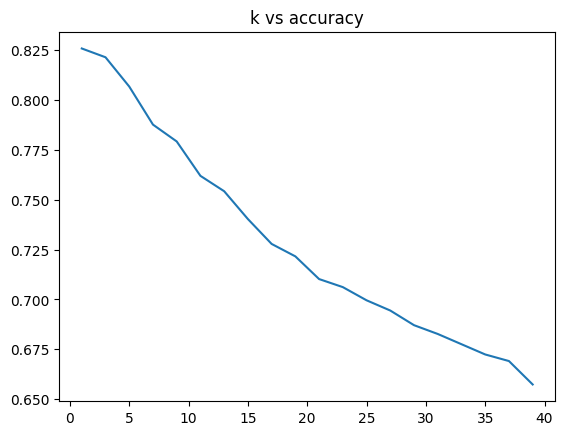

In [ ]:
plt.plot(k,acc)
plt.title("k vs accuracy")

Text(0.5, 1.0, 'k vs accuracy')

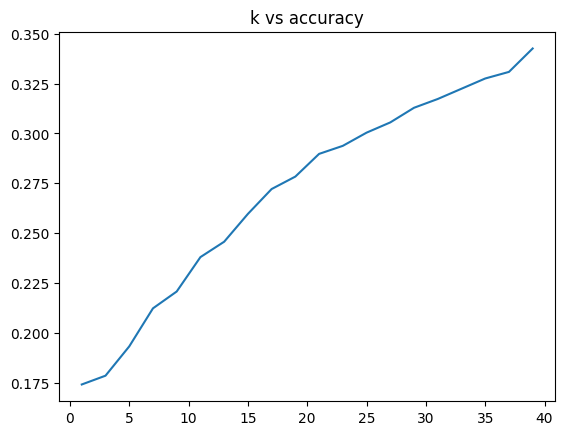

In [ ]:
plt.plot(k,err)
plt.title("k vs accuracy")

In [ ]:
x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,random_state=10,stratify=y_train)

In [ ]:
sc=RobustScaler()
x_trainf=sc.fit_transform(x_trainf)
x_cv=sc.transform(x_cv)
x_test=sc.transform(x_test)

In [ ]:
## method 2

k=[]
acc_cv=[]
err_cv=[]
for n in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=n)
  model=knn.fit(x_trainf,y_trainf)
  predicted=model.predict(x_cv)
  k.append(n)
  acc_cv.append(accuracy_score(y_cv,predicted))
  err_cv.append(1-accuracy_score(y_cv,predicted))

Text(0.5, 1.0, 'k vs accuracy')

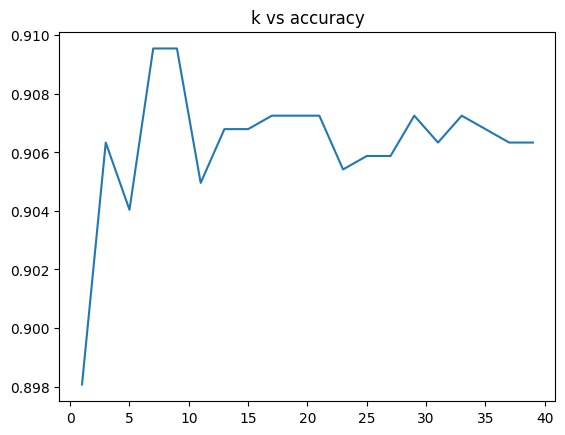

In [ ]:

plt.plot(k,acc_cv)
plt.title("k vs accuracy")

Text(0.5, 1.0, 'k vs error')

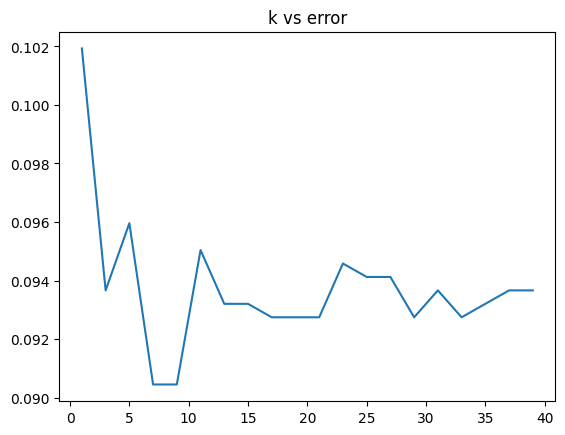

In [ ]:

plt.plot(k,err_cv)
plt.title("k vs error")

train and test error plotting

In [ ]:

k1=[]
tr_err=[]
cv_err=[]
for k in range(1,40,2):
  k1.append(k)
  knn=KNeighborsClassifier(n_neighbors=k)
  model=knn.fit(x_trainf,y_trainf)
  #training error
  pred_t=model.predict(x_trainf)
  tr_err.append(1-accuracy_score(y_trainf,pred_t))
  #cv error
  pred_cv=model.predict(x_cv)
  cv_err.append(1-accuracy_score(y_cv,pred_cv))

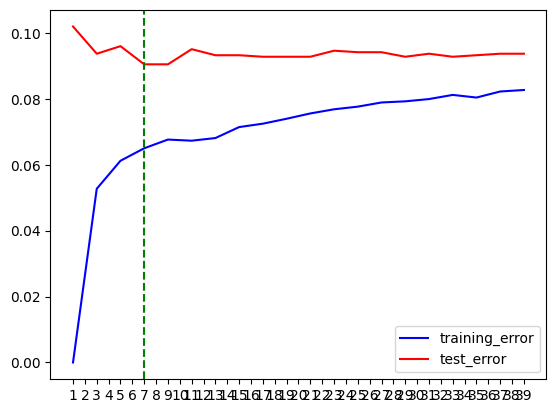

In [ ]:
plt.plot(k1,tr_err,label="training_error",color='b')
plt.plot(k1,cv_err,label="test_error",color='r')
plt.xticks(range(1,40))
plt.axvline(x=7, color='g', linestyle='--')
plt.legend()

 kfold and stratified k fold

In [ ]:
kf=KFold(n_splits=3)

k1=[]
f_acc=[]
for k in range(1,20,2):

  acc=[]
  for train_index,cv_index in kf.split(x_train):
    x_trainf,x_cv,y_trainf,y_cv=x_train.iloc[train_index],x_train.iloc[cv_index],y_train.iloc[train_index],y_train.iloc[cv_index]
    knn=KNeighborsClassifier(n_neighbors=k)
    model=knn.fit(x_trainf,y_trainf)
    predicted=model.predict(x_cv)
    acc.append(accuracy_score(y_cv,predicted))
  f_acc.append(np.mean(np.array(acc)))
  k1.append(k)

In [ ]:
final_acc=[]
k1=[]
for k in range(1,40,2):
  final_acc.append(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=k),x_train,y_train,scoring='accuracy',cv=5)))
  k1.append(k)


In [ ]:
final_acc

[0.17836299268628997,
 0.1587993350635853,
 0.18102501610247884,
 0.18809732603944823,
 0.1942506030784312,
 0.20371038231313005,
 0.2038024627618314,
 0.205455777130726,
 0.2117919918270693,
 0.2117923714532893,
 0.22014946306089245,
 0.22217071959837234,
 0.22667068226846068,
 0.2299776062710877,
 0.22795672935982786,
 0.22795647627568116,
 0.2297926439405539,
 0.23291519614232267,
 0.23337475477200703,
 0.2327320475815068]

##### Getting Generalised accuracy through different algorithms

In [ ]:

## testing accuracy on unseen data
knn=KNeighborsClassifier(n_neighbors=7)
model=knn.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)*100

90.23136246786633

In [ ]:
brutef=KNeighborsClassifier(n_neighbors=7,algorithm='brute')
model=brutef.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)*100

90.23136246786633

In [ ]:
kdtree=KNeighborsClassifier(n_neighbors=7,algorithm='kd_tree')
model=kdtree.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)*100

90.23136246786633

In [ ]:
balltree=KNeighborsClassifier(n_neighbors=7,algorithm='ball_tree')
model=balltree.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)*100

90.23136246786633

In [ ]:
auto=KNeighborsClassifier(n_neighbors=7,algorithm='auto')
model=auto.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)*100

90.23136246786633

#### Conclusion


After analyzing the performance of the K-nearest neighbors (KNN) algorithm with different values of k after feature scaling, we've determined that k=7
provides the best accuracy. At this point, the accuracy is high, and there's minimal change in accuracy beyond this value. Additionally, the error is relatively low when k=7.


After conducting an extensive evaluation of various algorithms, including KDTree, BallTree, and Brute-Force, we've observed that they all exhibit a similar level of performance in terms of accuracy. Across the board, regardless of the algorithm employed, the general accuracy rate remains consistently at 90%.

This finding suggests that the choice of algorithm doesn't significantly impact the predictive capability of the model. Despite their differences in implementation and computational complexity, these algorithms yield comparable results in terms of accuracy.